# 2017 NCTU Data Maning HW0

#### 0416037 李家安

### Info
- Group 3
- Dataset: [New York Citi Bike Trip Histories](https://www.citibikenyc.com/system-data), [first data](https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip)

### Task
- Preprocess null data and noice
- Future used for station_id, time, in_flow_count, out_flow_count

### Query
1. average distance
2. top 3 frequent stations pairs
3. top 3 highest average out-flow/in-flow
4. most popular station
5. find insteresting query or observation in dataset

In [2]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.metrics import pairwise
from pyproj import Geod

In [3]:
df = pd.read_csv('201707-citibike-tripdata.csv')

## Data info

In [4]:
print('column numbers: ' + str(len(df.columns)))
print('row numbers: ' + str(len(df.index)))

column numbers: 15
row numbers: 1735599


In [5]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2
5,545,2017-07-01 00:00:18,2017-07-01 00:09:24,361,Allen St & Hester St,40.716059,-73.991908,502,Henry St & Grand St,40.714215,-73.981346,21203,Subscriber,1954.0,2
6,1496,2017-07-01 00:00:18,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.757246,-73.978059,546,E 30 St & Park Ave S,40.744449,-73.983035,15933,Customer,1971.0,1
7,1495,2017-07-01 00:00:19,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.757246,-73.978059,546,E 30 St & Park Ave S,40.744449,-73.983035,18515,Customer,1964.0,2
8,593,2017-07-01 00:00:27,2017-07-01 00:10:20,3314,W 95 St & Broadway,40.793770,-73.971888,3363,E 102 St & Park Ave,40.790483,-73.950331,29135,Subscriber,1982.0,1
9,1950,2017-07-01 00:00:30,2017-07-01 00:33:00,3085,Roebling St & N 4 St,40.714690,-73.957390,468,Broadway & W 56 St,40.765265,-73.981923,17365,Subscriber,1983.0,1


## Data Preprocessing

### Remove NAN
觀察發現只有 gender 有出現 NAN，又我覺得 gender 無法以現有資料補全，因此選擇 drop 有 NAN 的 row

In [6]:
print(df.isnull().sum().sum())
print(pd.isnull(df).sum() > 0)
df = df[~df.isin(df[df.isnull().any(axis=1)])].dropna().reset_index(drop=True)
df

228596
tripduration               False
starttime                  False
stoptime                   False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                  True
gender                     False
dtype: bool


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364.0,2017-07-01 00:00:00,2017-07-01 00:06:05,539.0,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744.0,Subscriber,1986.0,1.0
1,2142.0,2017-07-01 00:00:03,2017-07-01 00:35:46,293.0,Lafayette St & E 8 St,40.730207,-73.991026,3425.0,2 Ave & E 104 St,40.789210,-73.943708,19587.0,Subscriber,1981.0,1.0
2,328.0,2017-07-01 00:00:08,2017-07-01 00:05:37,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,3397.0,Court St & Nelson St,40.676395,-73.998699,27937.0,Subscriber,1984.0,2.0
3,2530.0,2017-07-01 00:00:11,2017-07-01 00:42:22,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,26066.0,Subscriber,1985.0,1.0
4,2534.0,2017-07-01 00:00:15,2017-07-01 00:42:29,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,29408.0,Subscriber,1982.0,2.0
5,545.0,2017-07-01 00:00:18,2017-07-01 00:09:24,361.0,Allen St & Hester St,40.716059,-73.991908,502.0,Henry St & Grand St,40.714215,-73.981346,21203.0,Subscriber,1954.0,2.0
6,1496.0,2017-07-01 00:00:18,2017-07-01 00:25:15,3233.0,E 48 St & 5 Ave,40.757246,-73.978059,546.0,E 30 St & Park Ave S,40.744449,-73.983035,15933.0,Customer,1971.0,1.0
7,1495.0,2017-07-01 00:00:19,2017-07-01 00:25:15,3233.0,E 48 St & 5 Ave,40.757246,-73.978059,546.0,E 30 St & Park Ave S,40.744449,-73.983035,18515.0,Customer,1964.0,2.0
8,593.0,2017-07-01 00:00:27,2017-07-01 00:10:20,3314.0,W 95 St & Broadway,40.793770,-73.971888,3363.0,E 102 St & Park Ave,40.790483,-73.950331,29135.0,Subscriber,1982.0,1.0
9,1950.0,2017-07-01 00:00:30,2017-07-01 00:33:00,3085.0,Roebling St & N 4 St,40.714690,-73.957390,468.0,Broadway & W 56 St,40.765265,-73.981923,17365.0,Subscriber,1983.0,1.0


### station table

In [7]:
try:
    station = pd.read_csv('station.csv')
except:
    station = pd.DataFrame(df[['start station id', 'start station name', 'start station latitude', 'start station longitude']])
    station.columns = ['id', 'name', 'latitude', 'longitude']
    tmp = pd.DataFrame(df[['end station id', 'end station name', 'end station latitude', 'end station longitude']])
    tmp.columns = ['id', 'name', 'latitude', 'longitude']
    station = pd.concat([station, tmp])
    station = station.sort_values('id').drop_duplicates().reset_index(drop=True)
    station.to_csv('station.csv', index=False)
station

,id,name,latitude,longitude,in,out,freq
0,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3352,3381,6733
1,79.0,Franklin St & W Broadway,40.719116,-74.006667,2608,2561,5169
2,82.0,St James Pl & Pearl St,40.711174,-74.000165,974,1050,2024
3,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,1640,1399,3039
4,116.0,W 17 St & 8 Ave,40.741776,-74.001497,3812,3732,7544
5,119.0,Park Ave & St Edwards St,40.696089,-73.978034,292,244,536
6,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282,875,948,1823
7,127.0,Barrow St & Hudson St,40.731724,-74.006744,5690,5594,11284
8,128.0,MacDougal St & Prince St,40.727103,-74.002971,6262,6317,12579
9,143.0,Clinton St & Joralemon St,40.692395,-73.993379,1993,2005,3998


### path table

In [8]:
try:
    path = read_csv('path.csv')
except:
    path = df.drop(['start station name', 'start station latitude', 'start station longitude', 'end station name', 'end station latitude', 'end station longitude'], axis=1)
    path.to_csv('path.csv', index=False)
path

,tripduration,starttime,stoptime,start station id,end station id,bikeid,usertype,birth year,gender
0,364.0,2017-07-01 00:00:00,2017-07-01 00:06:05,539.0,3107.0,14744.0,Subscriber,1986.0,1.0
1,2142.0,2017-07-01 00:00:03,2017-07-01 00:35:46,293.0,3425.0,19587.0,Subscriber,1981.0,1.0
2,328.0,2017-07-01 00:00:08,2017-07-01 00:05:37,3242.0,3397.0,27937.0,Subscriber,1984.0,2.0
3,2530.0,2017-07-01 00:00:11,2017-07-01 00:42:22,2002.0,398.0,26066.0,Subscriber,1985.0,1.0
4,2534.0,2017-07-01 00:00:15,2017-07-01 00:42:29,2002.0,398.0,29408.0,Subscriber,1982.0,2.0
5,545.0,2017-07-01 00:00:18,2017-07-01 00:09:24,361.0,502.0,21203.0,Subscriber,1954.0,2.0
6,1496.0,2017-07-01 00:00:18,2017-07-01 00:25:15,3233.0,546.0,15933.0,Customer,1971.0,1.0
7,1495.0,2017-07-01 00:00:19,2017-07-01 00:25:15,3233.0,546.0,18515.0,Customer,1964.0,2.0
8,593.0,2017-07-01 00:00:27,2017-07-01 00:10:20,3314.0,3363.0,29135.0,Subscriber,1982.0,1.0
9,1950.0,2017-07-01 00:00:30,2017-07-01 00:33:00,3085.0,468.0,17365.0,Subscriber,1983.0,1.0


### in / out flow table
Get in / out flow count

In [9]:
import bisect

try:
    out_flow = pd.read_csv('out_flow.csv')
    in_flow = pd.read_csv('in_flow.csv')
except:
    begin = datetime.datetime(2017, 7, 1, 0, 0, 0)
    end = datetime.datetime(2017, 7, 31, 23, 30, 0)
    date_list = [ end - datetime.timedelta(seconds=x*60*30) for x in range(0, 1488)][::-1]
    #print(date_list)

    tmp = pd.DataFrame(np.zeros((len(station['id']), len(date_list))), columns=date_list)
    in_flow = pd.DataFrame({'id': list(station['id'])}).join(tmp)
    out_flow = pd.DataFrame({'id': list(station['id'])}).join(tmp)
    #in_flow

    get_idx = {}
    for idx, row in station.iterrows():
        get_idx[row.iloc[0]] = idx

    for idx, row in path.iterrows():
        date = datetime.datetime.strptime(row.iloc[1], "%Y-%m-%d %H:%M:%S")
        out_num = bisect.bisect_right(date_list, date)
        out_flow.iloc[get_idx[row.iloc[3]], out_num] += 1
        date = datetime.datetime.strptime(row.iloc[2], "%Y-%m-%d %H:%M:%S")
        in_num = bisect.bisect_right(date_list, date)
        in_flow.iloc[get_idx[row.iloc[4]], in_num] += 1

    out_flow.to_csv('out_flow.csv', index=False)
    in_flow.to_csv('in_flow.csv', index=False)
print('in-flow')
print(in_flow)
print('out-flow')
print(out_flow)

in-flow
         id  2017-07-01 00:00:00  2017-07-01 00:30:00  2017-07-01 01:00:00  \
0      72.0                  1.0                  0.0                  2.0   
1      79.0                  1.0                  0.0                  0.0   
2      82.0                  0.0                  0.0                  0.0   
3      83.0                  0.0                  0.0                  0.0   
4     116.0                  0.0                  0.0                  0.0   
5     119.0                  0.0                  0.0                  0.0   
6     120.0                  0.0                  0.0                  1.0   
7     127.0                  0.0                  2.0                  2.0   
8     128.0                  1.0                  1.0                  1.0   
9     143.0                  0.0                  0.0                  0.0   
10    144.0                  0.0                  0.0                  0.0   
11    146.0                  0.0                  0.0   

## Query

### 1. average distance

In [10]:
from pyproj import Geod
wgs84_geod = Geod(ellps='WGS84')

def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2)
    return dist

try:
    dist = pd.read_csv('dist.csv')
except:
    dist = pd.DataFrame(columns=['begin', 'end', 'dist'])

    for idx1, row1 in station.iterrows():
        for idx2, row2 in station.iterrows():
            dist = dist.append(pd.Series([row1.iloc[0], row2.iloc[0], Distance(row1.iloc[2], row1.iloc[3], row2.iloc[2], row2.iloc[3])], index=['begin','end', 'dist']), ignore_index=True)
            #print(row1.iloc[0], row2.iloc[0], Distance(row1.iloc[2], row1.iloc[3], row2.iloc[2], row2.iloc[3]))
            #print(dist)
    dist.to_csv('dist.csv', index=False)
dist

,begin,end,dist
0,72.0,72.0,0.000000
1,72.0,79.0,5454.887660
2,72.0,82.0,6251.852068
3,72.0,83.0,9385.185658
4,72.0,116.0,2902.567147
5,72.0,119.0,8017.980523
6,72.0,120.0,9406.865190
7,72.0,127.0,4093.238958
8,72.0,128.0,4525.685810
9,72.0,143.0,8315.137982


In [11]:
sz = station.shape[0]
n = sz * (sz-1) / 2
ans = 0
for idx, row in dist.iterrows():
    if row.iloc[0] == row.iloc[1]:
        continue
    ans += row.iloc[2] / n
print('average distance:', ans, 'm')

average distance: 10786.9349309 m


### 2. top 3 frequent stations pairs on weekday / weekend

In [12]:
from collections import defaultdict
import datetime

weekday = dict()
weekday = defaultdict(lambda: 0, weekday)
weekend = dict()
weekend = defaultdict(lambda: 0, weekend)

for idx, row in path.iterrows():
    if datetime.datetime.strptime(row.iloc[1], "%Y-%m-%d %H:%M:%S").isoweekday() > 5: # weekend
        weekend[(row.iloc[3], row.iloc[4])] += 1
    else:
        weekday[(row.iloc[3], row.iloc[4])] += 1

top_weekday = sorted(weekday, key=weekday.get)[::-1][:3]
top_weekend = sorted(weekend, key=weekend.get)[::-1][:3]
print(top_weekday)
print(top_weekend)

[(432.0, 3263.0), (3263.0, 432.0), (519.0, 498.0)]
[(3254.0, 3182.0), (3182.0, 3182.0), (3182.0, 3254.0)]


#### Weekday top 3
- 432 to 3263
- 3263 to 432
- 519 to 498

#### Weekend top 3
- 3254 to 3182
- 3182 to 3182
- 3182 to 3254

### 3. top 3 frequent stations with highest average out-flow / in-flow on weekday / weekend

In [13]:
from collections import defaultdict
import datetime
    
weekday_in = dict()
weekday_in = defaultdict(lambda: 0, weekday_in)
weekend_in = dict()
weekend_in = defaultdict(lambda: 0, weekend_in)
weekday_out = dict()
weekday_out = defaultdict(lambda: 0, weekday_out)
weekend_out = dict()
weekend_out = defaultdict(lambda: 0, weekend_out)
allDay_in = dict()
allDay_in = defaultdict(lambda: 0, allDay_in)
allDay_out = dict()
allDay_out = defaultdict(lambda: 0, allDay_out)
allDay = dict()
allDay = defaultdict(lambda: 0, allDay)

for idx, row in path.iterrows():
    if 'freq' not in station.columns:
        allDay_in[row.iloc[4]] += 1
        allDay_out[row.iloc[3]] += 1
        allDay[row.iloc[4]] += 1
        allDay[row.iloc[3]] += 1
    if datetime.datetime.strptime(row.iloc[1], "%Y-%m-%d %H:%M:%S").isoweekday() > 5: # weekend
        weekend_out[row.iloc[3]] += 1
        weekend_in[row.iloc[4]] += 1
    else:
        weekday_out[row.iloc[3]] += 1
        weekday_in[row.iloc[4]] += 1

if 'freq' not in station.columns:
    station['in'] = station['id'].map(allDay_in)
    station['out'] = station['id'].map(allDay_out)
    station['freq'] = station['id'].map(allDay)
    station.to_csv('station.csv', index=False)

top_weekday_in = sorted(weekday_in, key=weekday_in.get)[::-1][:3]
top_weekday_out = sorted(weekday_out, key=weekday_out.get)[::-1][:3]
top_weekend_in = sorted(weekend_in, key=weekend_in.get)[::-1][:3]
top_weekend_out = sorted(weekend_out, key=weekend_out.get)[::-1][:3]
print('weekday in_flow:', top_weekday_in)
print('weekday out_flow:', top_weekday_in)
print('weekend in_flow:', top_weekend_in)
print('weekend out_flow:', top_weekend_in)

weekday in_flow: [519.0, 402.0, 426.0]
weekday out_flow: [519.0, 402.0, 426.0]
weekend in_flow: [426.0, 435.0, 497.0]
weekend out_flow: [426.0, 435.0, 497.0]


### 4. most popular station

#### a. line-chart for in-flow / out-flow

drow line chart

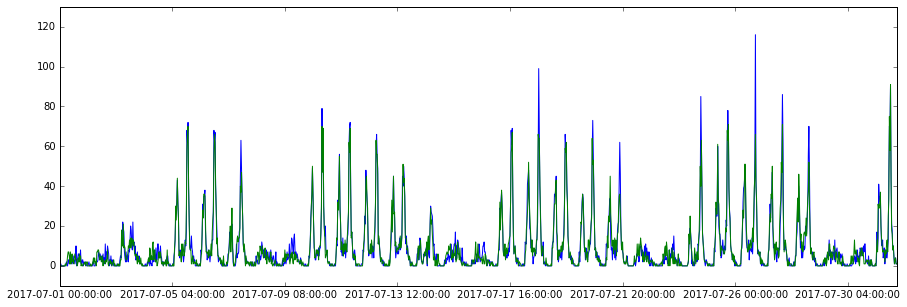

In [14]:
import matplotlib.pyplot as plt

most = station.nlargest(1, 'freq').index[0]

in_most = in_flow.iloc[most][1:]
out_most = out_flow.iloc[most][1:]

plt.figure()
axes = plt.gca()
axes.set_ylim([-10,130])
out_most.plot(figsize=(15, 5))
in_most.plot(figsize=(15, 5))
plt.show()

#### b. Calculate the distance function

In [15]:
from sklearn.metrics import pairwise

pairwise.pairwise_distances(np.array([in_most.tolist(), out_most.tolist()]), metric='minkowski', n_jobs=4, p=2)[0][1]

171.40303381212365

#### c. in / out flow -mean line chart and distance

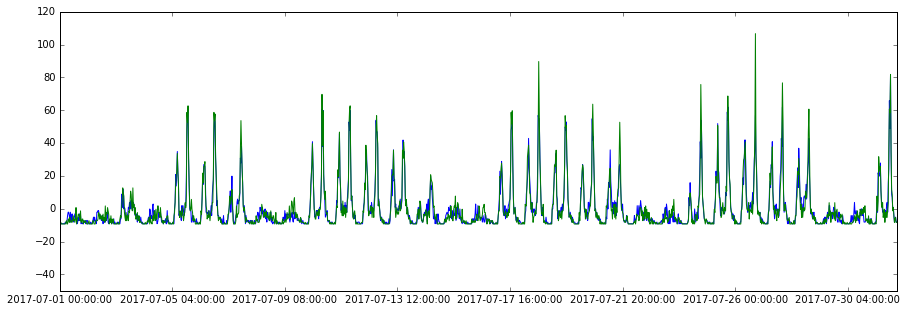

171.28531933087413

In [16]:
plt.figure()
axes = plt.gca()
axes.set_ylim([-50,120])
in_most.sub(in_most.mean()).plot(figsize=(15, 5))
out_most.sub(out_most.mean()).plot(figsize=(15, 5))
plt.show()
# print(in_most.mean())
# print(out_most.mean())
pairwise.pairwise_distances(np.array([in_most.sub(in_most.mean()).tolist(), out_most.sub(out_most.mean()).tolist()]), metric='minkowski', n_jobs=4, p=2)[0][1]

#### d. in / out flow -mean/std lin chart and distance

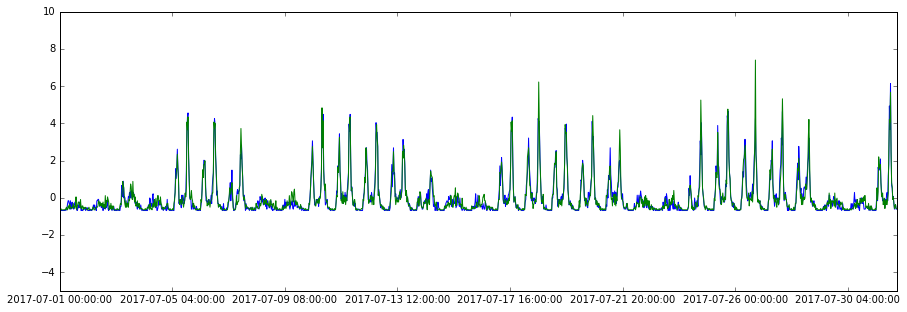

11.990369115699348

In [17]:
plt.figure()
axes = plt.gca()
axes.set_ylim([-5,10])
in_most.sub(in_most.mean()).divide(in_most.std()).plot(figsize=(15, 5))
out_most.sub(out_most.mean()).divide(out_most.std()).plot(figsize=(15, 5))
plt.show()
#print(in_most.mean(), in_most.std())
#print(out_most.mean(), out_most.std())
pairwise.pairwise_distances(np.array([in_most.sub(in_most.mean()).divide(in_most.std()).tolist(), out_most.sub(out_most.mean()).divide(out_most.std()).tolist()]), metric='minkowski', n_jobs=4, p=2)[0][1]

#### e. in / out flow linear regression line chart and distance

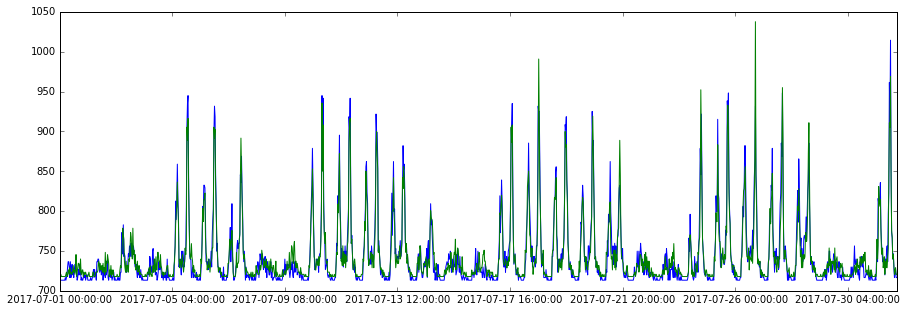

530.12990552891745

In [18]:
from sklearn import linear_model
import matplotlib.pyplot as plt

reg_in = linear_model.LinearRegression(normalize=True)
reg_out = linear_model.LinearRegression(normalize=True)
y = [i for i in range(len(in_most))]
in_X = [[i] for i in in_most.tolist()]
out_X = [[i] for i in out_most.tolist()]
reg_in.fit(X=in_X, y=y)
reg_out.fit(X=out_X, y=y)

in_df = pd.DataFrame(reg_in.predict(in_X)).T
in_df.columns = in_most.keys()
out_df = pd.DataFrame(reg_out.predict(out_X)).T
out_df.columns = out_most.keys()

in_s = in_df.iloc[0][:]
out_s = out_df.iloc[0][:]

plt.figure()
in_s.plot(figsize=(15, 5))
out_s.plot(figsize=(15, 5))
plt.show()

pairwise.pairwise_distances(np.array([in_s.tolist(), out_s.tolist()]), metric='minkowski', n_jobs=4, p=2)[0][1]

#### f. smoothing

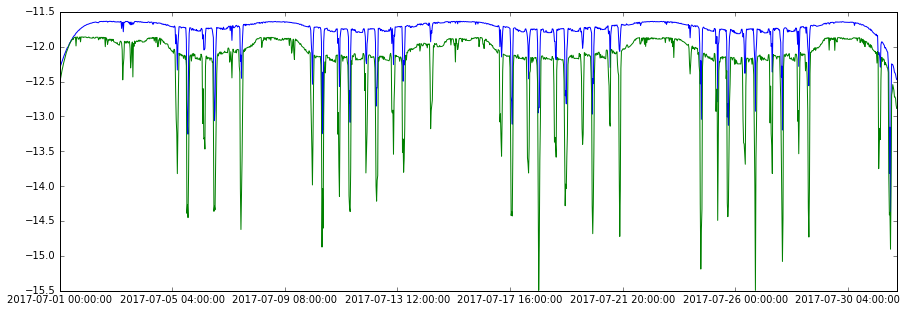

In [19]:
from sklearn.neighbors.kde import KernelDensity

in_tmp = [[i, j] for i,j in enumerate(in_most)]
out_tmp = [[j, i] for i,j in enumerate(out_most)]
kde_in = KernelDensity(kernel='gaussian', bandwidth=30).fit(in_tmp)
kde_out = KernelDensity(kernel='cosine', bandwidth=30).fit(out_tmp)
in_arr = kde_in.score_samples(in_tmp)
out_arr = kde_out.score_samples(out_tmp)

in_ss = pd.Series(in_arr.tolist(), index=in_most.keys())
out_ss = pd.Series(out_arr.tolist(), index=in_most.keys())
#print(in_ss)

plt.figure()
# axes = plt.gca()
# axes.set_ylim([0,1])
in_ss.plot(figsize=(15, 5))
out_ss.plot(figsize=(15, 5))
plt.show()

### 5. Some interesting info

根據上面的資料，我們可以發現尖峰時刻是有大週期的，而有趣的是，除了大週期之外，每個大週期內，也都有小週期，大週期與小週期的成因，也許是可以研究的方向。